In [1]:
 import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from sklearn.preprocessing import StandardScaler    # module pour centrer et réduire les variables
from sklearn.decomposition import PCA

In [12]:
import sklearn.datasets as sk_data
iris = sk_data.load_iris()
X = iris.data    # les données(lignes = individus, colonnes = variables)
y = iris.target   # les étiquettes (=la variété des iris)
print(X.shape)

(150, 4)


In [5]:
sc_scaled = StandardScaler().fit(X)
Xcr = sc_scaled.transform(X)

n=Xcr.shape[0]
p=Xcr.shape[1]

In [6]:
acp = PCA()
acp.fit(Xcr)
print(acp)

# axes principaux : les vecteurs propres
axes_principaux=acp.components_    
# composantes principales = les nouvelles coordonnées
composantes_principales = acp.fit_transform(Xcr)     
# les variances expliquées = les valeurs propres
var_exp=(n-1)/n*acp.explained_variance_

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [7]:
PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Proportion de variance expliquée [0.72962445 0.22850762 0.03668922 0.00517871]


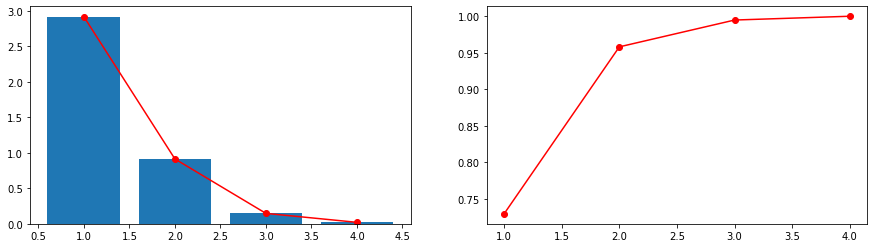

In [17]:
 #proportion de variance expliquée
print("Proportion de variance expliquée", acp.explained_variance_ratio_)

#éboulis des valeurs propres
fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(121)
ax1.bar(np.arange(1,p+1),var_exp)
ax1.plot(np.arange(1,p+1),var_exp, 'ro-')

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_), 'ro-')
plt.savefig("pca_iris.png")


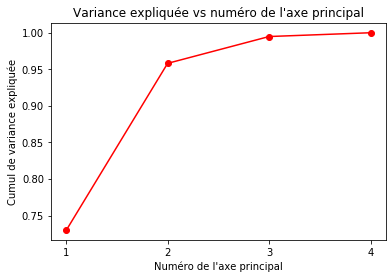

In [11]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_), 'ro-')
axes = plt.gca()
axes.xaxis.set_ticks(np.arange(1,p+1)) 
plt.title("Variance expliquée vs numéro de l'axe principal")
plt.ylabel("Cumul de variance expliquée")
plt.xlabel("Numéro de l'axe principal")
plt.show()

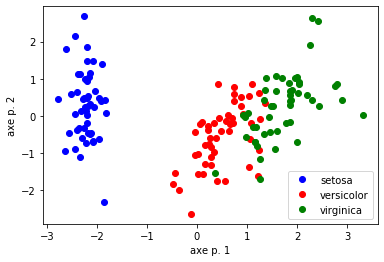

In [19]:
#positionnement des individus dans le plan des 2 premières composantes principales
indices_setosa=[]
indices_versicolor=[]
indices_virginica=[]
for i in range(y.shape[0]):
    if y[i]==0:
        indices_setosa.append(i)
    if y[i]==1:
        indices_versicolor.append(i)
    if y[i]==2:
        indices_virginica.append(i)
        
        
fig, axes = plt.subplots()
plt.clf()
plt.plot(composantes_principales[indices_setosa,0],composantes_principales[indices_setosa,1], 'bo', label='setosa')
plt.plot(composantes_principales[indices_versicolor,0],composantes_principales[indices_versicolor,1], 'ro', label='versicolor')
plt.plot(composantes_principales[indices_virginica,0],composantes_principales[indices_virginica,1], 'go', label='virginica')
plt.legend()
plt.xlabel('axe p. 1')
plt.ylabel('axe p. 2')
plt.savefig("PCA_reduc2_iris.png")

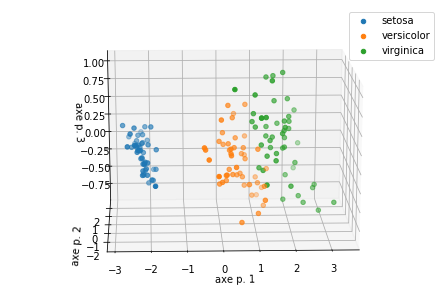

In [23]:
fig= plt.figure()
plt.clf()
ax = Axes3D(fig)
ax.scatter(composantes_principales[indices_setosa,0],composantes_principales[indices_setosa,1], composantes_principales[indices_setosa,2], label='setosa')
ax.scatter(composantes_principales[indices_versicolor,0],composantes_principales[indices_versicolor,1], composantes_principales[indices_versicolor,2], label='versicolor')
ax.scatter(composantes_principales[indices_virginica,0],composantes_principales[indices_virginica,1], composantes_principales[indices_virginica,2], label='virginica')

plt.legend()
ax.set_xlabel('axe p. 1')
ax.set_ylabel('axe p. 2')
ax.set_zlabel('axe p. 3')  
ax.view_init(16, -92)
plt.savefig("PCA_reduc3_iris.png")

In [29]:
import skimage.io as io
import skimage.color as color

In [30]:
f = io.imread("lena.tiff")
X = color.rgb2gray(f) 

>>> 512 >>>> 512


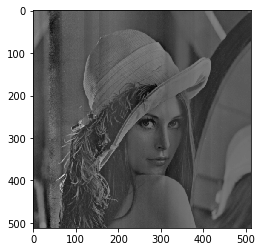

In [32]:
sc_scaled = StandardScaler().fit(X)
Xcr = sc_scaled.transform(X)
plt.imshow(Xcr, cmap="gray")

n=Xcr.shape[0]
p=Xcr.shape[1]
print(">>>",n,">>>>",p)

In [33]:
acp = PCA()
acp.fit(Xcr)
print(acp)

# axes principaux : les vecteurs propres
axes_principaux=acp.components_    
# composantes principales = les nouvelles coordonnées
composantes_principales = acp.fit_transform(Xcr)     
# les variances expliquées = les valeurs propres
var_exp=(n-1)/n*acp.explained_variance_

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [34]:
 PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

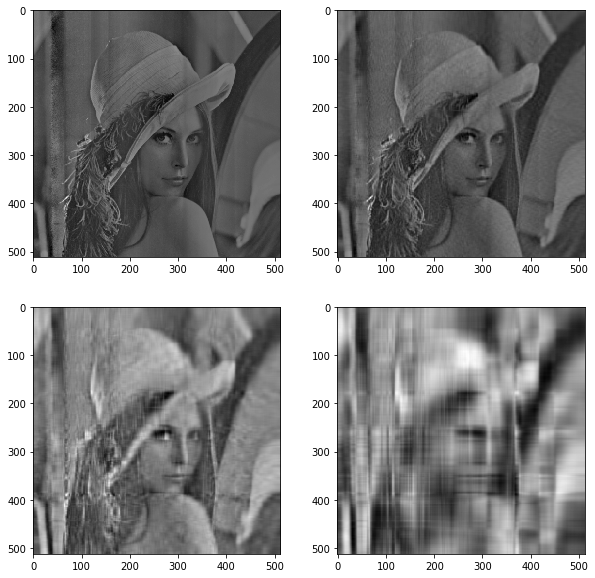

In [43]:
 # on retourne aux variables initiales
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(221)
q=260000
Xnouveau=np.matmul(composantes_principales[:,0:q] ,axes_principaux[0:q,:])
ax1.imshow(Xnouveau, cmap="gray")


ax2 = fig.add_subplot(222)
q=50
Xnouveau=np.matmul(composantes_principales[:,0:q] ,axes_principaux[0:q,:])
ax2.imshow(Xnouveau, cmap="gray")

ax3 = fig.add_subplot(223)
q=20
Xnouveau=np.matmul(composantes_principales[:,0:q] ,axes_principaux[0:q,:])
ax3.imshow(Xnouveau, cmap="gray")

ax4 = fig.add_subplot(224)
q=6
Xnouveau=np.matmul(composantes_principales[:,0:q] ,axes_principaux[0:q,:])
ax4.imshow(Xnouveau, cmap="gray")
plt.savefig("lena_ACP.png")